## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**About Dataset**

**Context**

This dataset was created for a Google Analytics Capstone project for a fictional company Cyclistic. The data were obtained from a real bike-share program of the Chicago Department of Transportation (CDOT), Divvy.

**Content**

Inside this dataset are 19 csv files of uncleaned bikeshare data spanning from January 2020 to September 2021.
It is important to note, that the data has some null values in station names, ids and coordinates. Additionaly there are major inconsistencies with station ids and station names.
License granted by Motivate International Inc.

**Acknowledgements**

We wouldn't be here without the help of others. If you owe any attributions or thanks, include them here along with any citations of past research.

**1.2 Importing Dataset**

In [5]:
!gdown 1w88qqNS6kadmYwoJEEA6bAIIrhjUELQK

Downloading...
From: https://drive.google.com/uc?id=1w88qqNS6kadmYwoJEEA6bAIIrhjUELQK
To: /content/202001_Q1.csv
100% 71.3M/71.3M [00:00<00:00, 198MB/s]


Coding diatas digunakan untuk mendownload file dari google drive

In [25]:
import pandas as pd
dataset = pd.read_csv('/content/202001_Q1.csv')
dataset

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,docked_bike,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,docked_bike,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,HQ QR,675.0,41.8899,-87.6803,41.8899,-87.6803,casual
426883,82B10FA3994BC66A,docked_bike,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,Sheridan Rd & Irving Park Rd,240.0,41.8958,-87.6259,41.9542,-87.6544,member
426884,AA0D5AAA0B59C8AA,docked_bike,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,Ashland Ave & Division St,210.0,41.9157,-87.6346,41.9035,-87.6677,casual
426885,3296360A7BC20FB8,docked_bike,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,Stetson Ave & South Water St,264.0,41.8910,-87.6355,41.8868,-87.6223,member


Coding diatas digunakan untuk menampilkan file csv

## 2. Exploratory Data

In [26]:
dataset.shape

(426887, 13)

Coding diatas digunakan untuk mengetahui bentuk dataset, seperti jumlah kolom dan barisnya

In [8]:
dataset.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

Coding diatas digunakan untuk mengetahui nama-nama kolom yang ada pada dataset

In [9]:
dataset.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

Coding diatas digunakan untuk mengetahui tipe data dari setiap kolom di dataset

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426887 entries, 0 to 426886
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             426887 non-null  object 
 1   rideable_type       426887 non-null  object 
 2   started_at          426887 non-null  object 
 3   ended_at            426887 non-null  object 
 4   start_station_name  426887 non-null  object 
 5   start_station_id    426887 non-null  int64  
 6   end_station_name    426886 non-null  object 
 7   end_station_id      426886 non-null  float64
 8   start_lat           426887 non-null  float64
 9   start_lng           426887 non-null  float64
 10  end_lat             426886 non-null  float64
 11  end_lng             426886 non-null  float64
 12  member_casual       426887 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 42.3+ MB


Coding diatas digunakan untuk menampilkan informasi detail tentang dataframe

In [28]:
dataset.nunique()

ride_id               426887
rideable_type              1
started_at            399265
ended_at              399532
start_station_name       607
start_station_id         607
end_station_name         602
end_station_id           602
start_lat                518
start_lng                484
end_lat                  514
end_lng                  482
member_casual              2
dtype: int64

Coding diatas digunakan untuk menampilkan jumlah unique tiap kolom pada dataset

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [29]:
dataset.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      1
end_station_id        1
start_lat             0
start_lng             0
end_lat               1
end_lng               1
member_casual         0
dtype: int64

Coding diatas digunakan untuk mengetahui kolom yang terdapat missing value

In [30]:
dataset[['end_station_name', 'end_station_id', 'end_lat', 'end_lng']].dtypes

end_station_name     object
end_station_id      float64
end_lat             float64
end_lng             float64
dtype: object

Perform imputer to handle missing value in numerical data

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [32]:
imputer = imputer.fit(dataset[['end_station_id', 'end_lat', 'end_lng']])
imputer

SimpleImputer()

In [33]:
dataset[['end_station_id', 'end_lat', 'end_lng']] = imputer.transform(dataset[['end_station_id', 'end_lat', 'end_lng']])
dataset.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      1
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Coding diatas digunakan untuk mengganti nilai missing value dengan statistika deskriptif

Using drop column tohandle missing value on categorical or object data

In [34]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

Coding diatas digunakan untuk menghilangkan dataset dengan tipe object

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [35]:
dataset.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,426887.000000,426887.000000,426887.000000,426887.000000,426887.000000,426887.000000
mean,209.797799,209.337947,41.897846,-87.644157,41.897998,-87.644254
std,163.222889,163.197938,0.038080,0.022666,0.038315,0.022662
min,2.000000,2.000000,41.736600,-87.774700,41.736600,-87.774700
25%,77.000000,77.000000,41.880300,-87.655000,41.880300,-87.655500
50%,176.000000,175.000000,41.890600,-87.639900,41.890600,-87.640800
75%,298.000000,297.000000,41.915700,-87.629500,41.916000,-87.629500
max,675.000000,675.000000,42.064900,-87.549400,42.064900,-87.549400


Coding diatas digunakan untuk menampilkan detai statistik 

<Axes: >

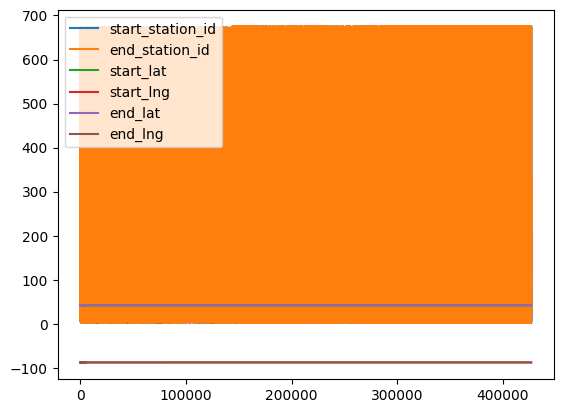

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Coding diatas digunakan untuk menampilkan visualisasi data. Pada diagram diatas dapat dilihat bahwa data berdekatan atau mendekati nilai rata-rata 

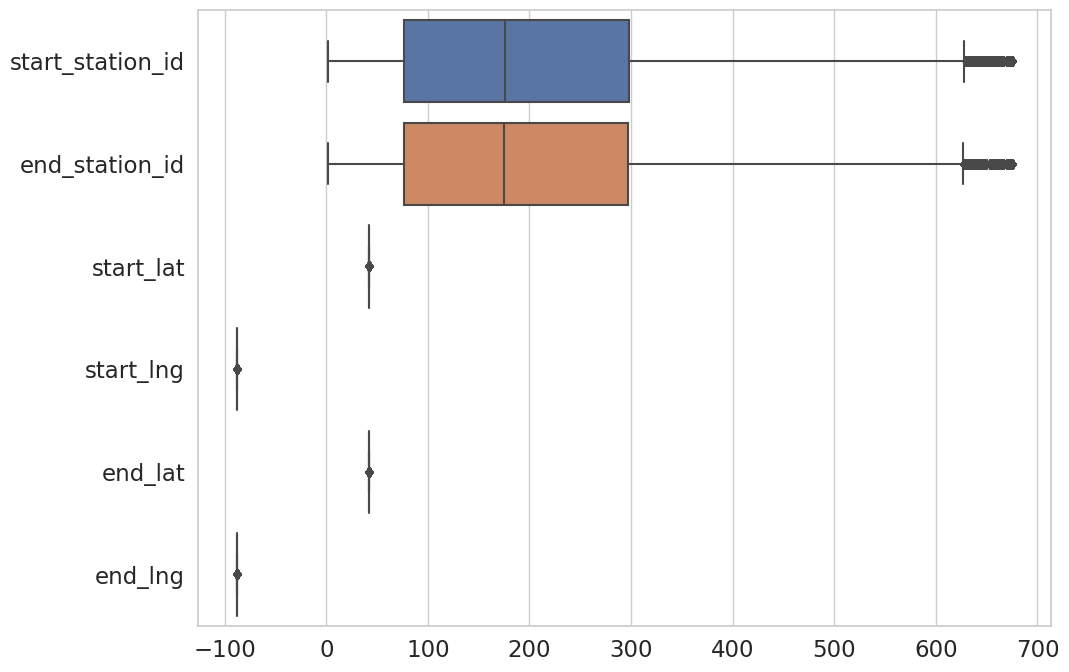

In [37]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Coding diatas digunakan untuk menampilkan visualisasi data. Pada diagram boxplot diatas dapat dilihat bahwa data berdekatan atau mendekati nilai rata-rata

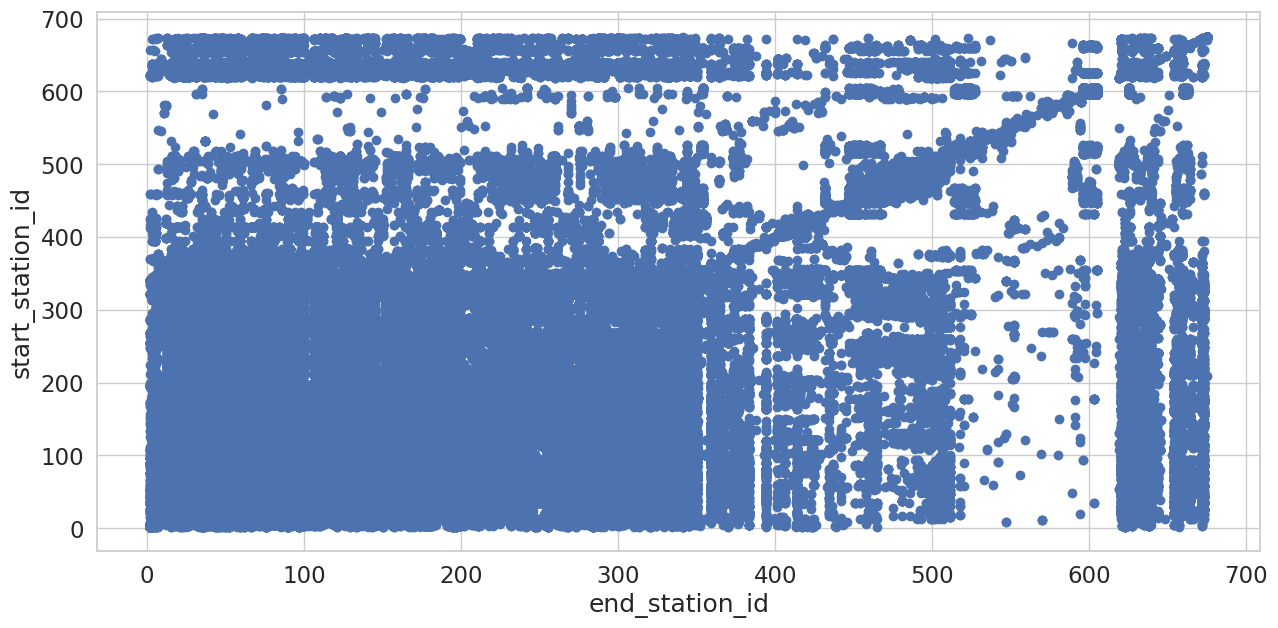

In [38]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['start_station_id'], dataset['end_station_id'])
 
# x-axis label
ax.set_xlabel('end_station_id')
 
# y-axis label
ax.set_ylabel('start_station_id')
plt.show()

Coding diatas digunakan untuk menampilkan visualisasi data. Pada diagram scatter plot diatas dapat dilihat bahwa data berdekatan atau mendekati nilai rata-rata

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset[''], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset[''], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset[''] > upper].index
outliers_lower = dataset[dataset[''] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset[''], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset[''], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset[''] > upper].index
outliers_lower = dataset[dataset[''] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


Coding diatas digunakan untuk menghilangkan outliers. Karena pada kasus ini tidak ada outliers maka coding tersebut tidak digunakan

Show data distribution based on density (kde - kernel density estimation)

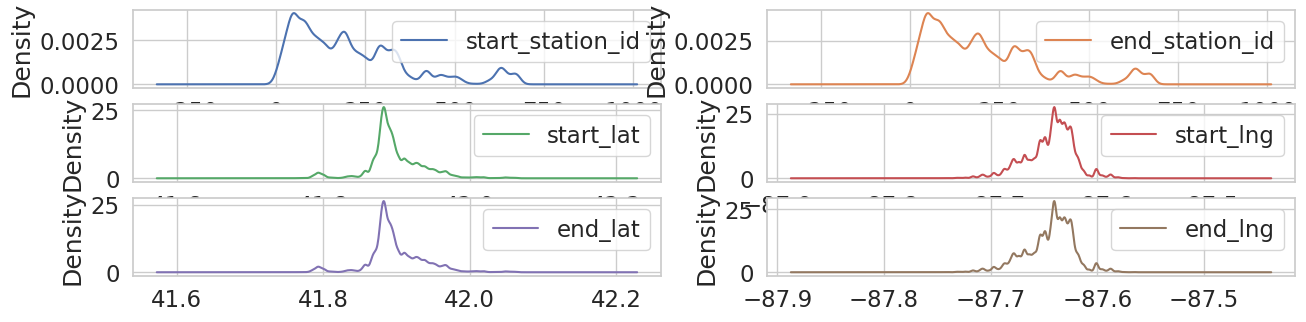

In [39]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Coding diatas digunakan untuk mengetahui kerapatan atau sebaran data yang dapat dilihat pada nilai-nilai yang ditampilkan dalam diagram.

Show data distribution based on histogram

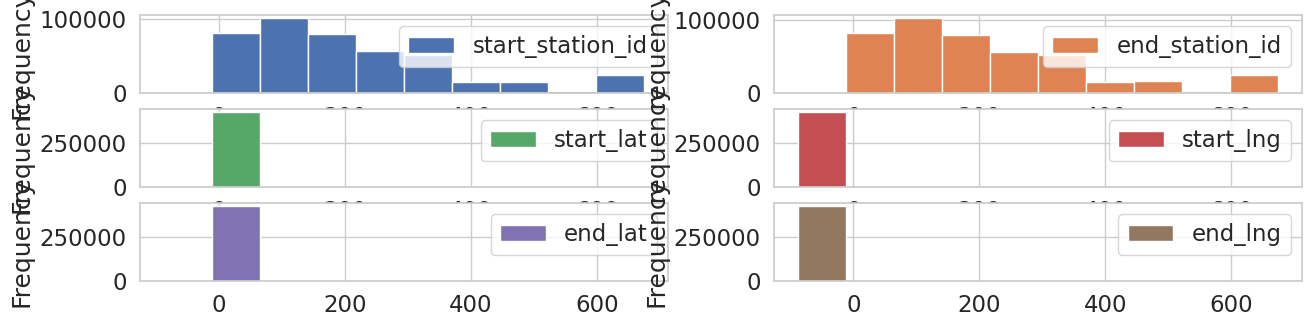

In [40]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Coding diatas digunakan untuk mengetahui frequency data yang dapat dilihat pada nilai-nilai yang ditampilkan pada diagram.

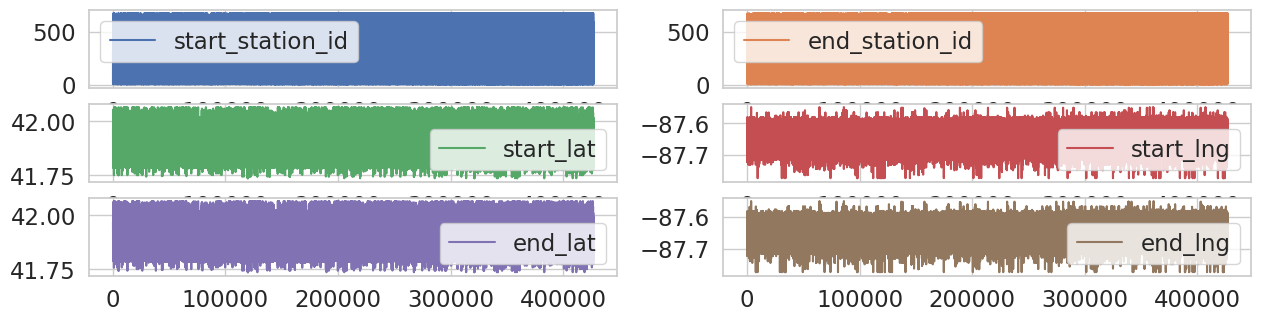

In [41]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Coding diatas digunakan untuk menampilkan sebaran signalic data

**3.2 CORRELATION MATRIX**

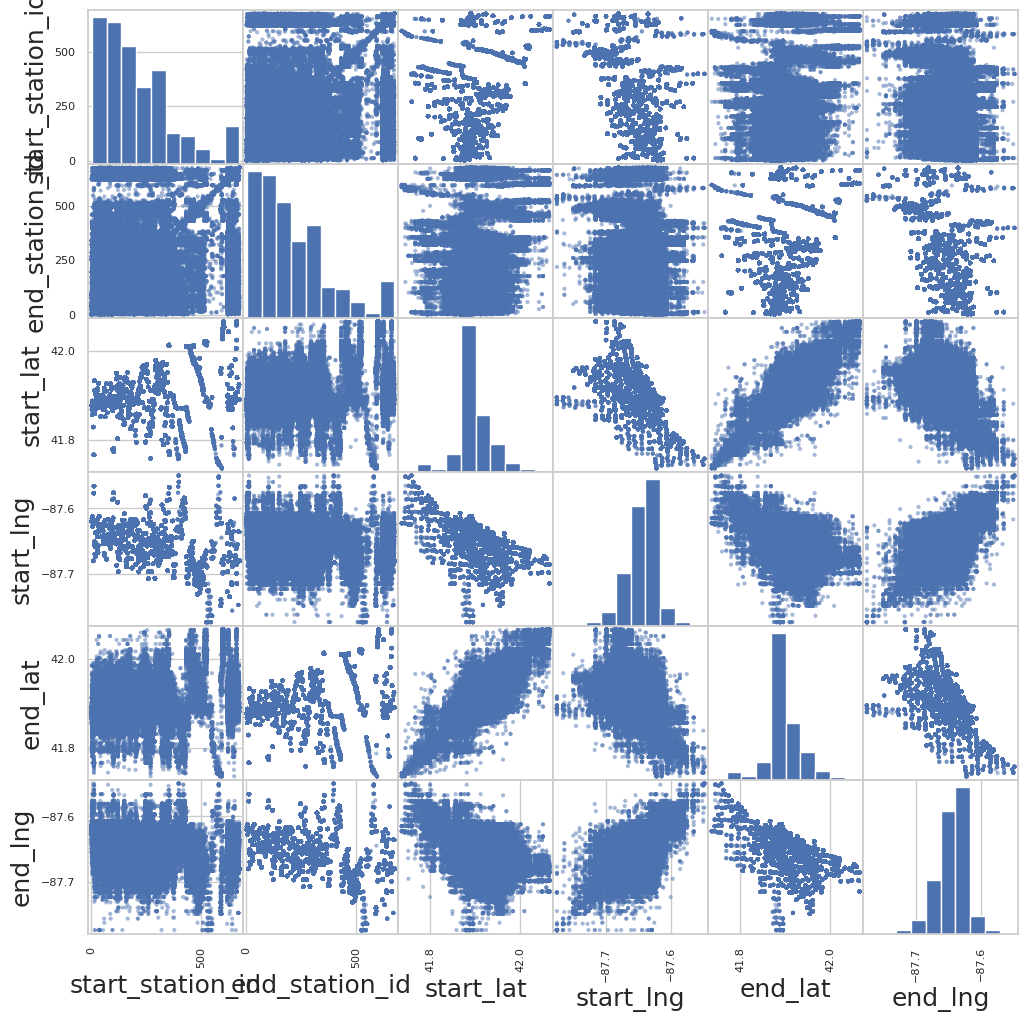

In [42]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

Coding diatas digunakan untuk menampilkan scatter plot dari setiap matrix untuk mengetahui korelasinya. Korelasi paling kuat digambarkan dengan diagram batang, dan korelasi paling lemah digambarkan dengan scatter plot yang tidak beraturan

correlation matrix with heatmap

<ipython-input-43-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


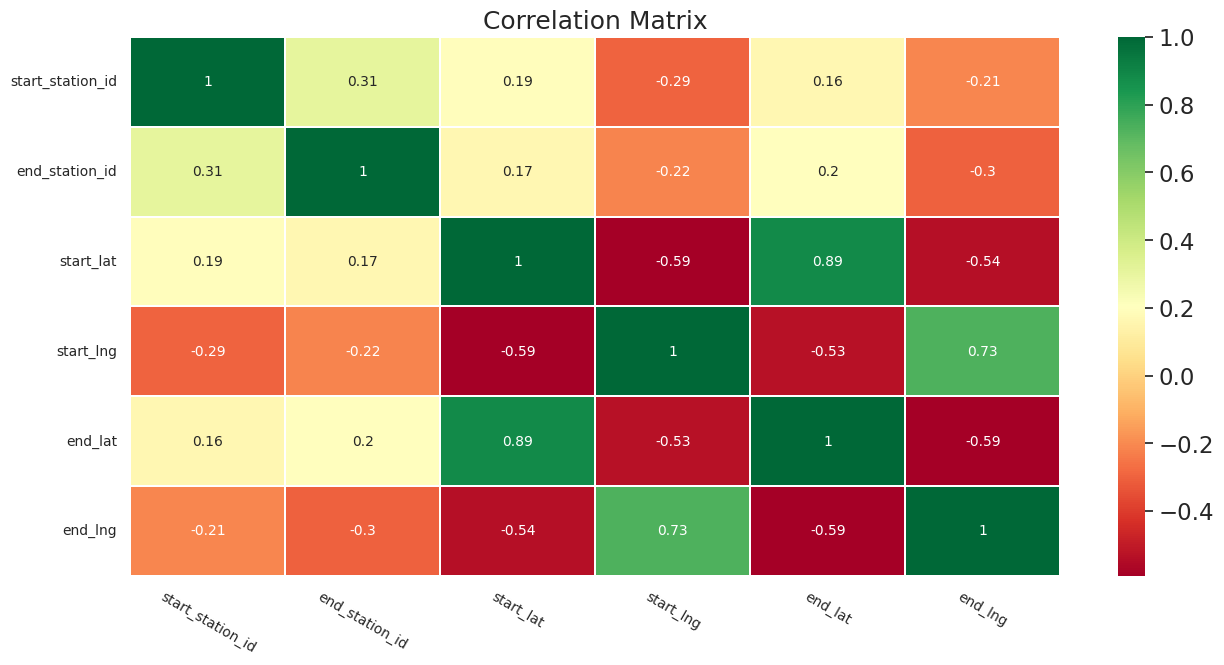

In [43]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Coding diatas digunakan untuk mengetahui tingkat korelasi matrix. Apabila nilai korelasi mencapai atau mendekati angka 1, maka korelasi matrix akan semakin kuat, begitupun sebaliknya 

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [42]:
x = dataset.drop('rideable_type', axis=1)
x

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EACB19130B0CDA4A,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,326.0,41.9665,-87.6884,41.9671,-87.6674,member
1,8FED874C809DC021,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,318.0,41.9616,-87.6660,41.9542,-87.6644,member
2,789F3C21E472CA96,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,117.0,41.9401,-87.6455,41.9402,-87.6530,member
3,C9A388DAC6ABF313,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,24.0,41.8846,-87.6319,41.8918,-87.6206,member
4,943BC3CBECCFD662,2020-01-30 08:37:16,2020-01-30 08:42:48,Clinton St & Lake St,66,212.0,41.8856,-87.6418,41.8899,-87.6343,member
...,...,...,...,...,...,...,...,...,...,...,...
426882,ADDAA33CEBCAE733,2020-03-10 10:40:06,2020-03-10 10:40:07,HQ QR,675,675.0,41.8899,-87.6803,41.8899,-87.6803,casual
426883,82B10FA3994BC66A,2020-03-07 15:25:55,2020-03-07 16:14:03,Rush St & Superior St,161,240.0,41.8958,-87.6259,41.9542,-87.6544,member
426884,AA0D5AAA0B59C8AA,2020-03-01 13:12:38,2020-03-01 13:38:29,Clark St & Lincoln Ave,141,210.0,41.9157,-87.6346,41.9035,-87.6677,casual
426885,3296360A7BC20FB8,2020-03-07 18:02:45,2020-03-07 18:13:18,Franklin St & Illinois St,672,264.0,41.8910,-87.6355,41.8868,-87.6223,member


Coding diatas digunakan untuk memilih kolom yang akan dijadikan data input

Choose feature Type as a label

In [43]:
y = dataset["rideable_type"]
y

0         docked_bike
1         docked_bike
2         docked_bike
3         docked_bike
4         docked_bike
             ...     
426882    docked_bike
426883    docked_bike
426884    docked_bike
426885    docked_bike
426886    docked_bike
Name: rideable_type, Length: 426887, dtype: object

Coding diatas digunakan untuk memilih kolom yang akan dijadikan label

In [44]:
y.values.reshape(-1,1)

array([['docked_bike'],
       ['docked_bike'],
       ['docked_bike'],
       ...,
       ['docked_bike'],
       ['docked_bike'],
       ['docked_bike']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [ ]:
x = pd.get_dummies(x)
x

Coding diatas digunakan untuk mengubah variabel kategori menjadi variabel dummy/indikator untuk agar data string dapat dibaca sebagai numerical. Karena pada saat saya run codingannya melebihi ram gcolab gratis ini, maka hasilnya tidak keluar(eror)

In [ ]:
x.shape

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

Coding diatas digunakan untuk mengeneralisasi data berdasarkan standar deviasinya

**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

Coding diatas digunakan untuk mengeneralisasi data berdasarkan rata-ratanya

**4.3 Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

COding diatas digunakan untuk membagi data menjadi data train dan data test. Data train>data test.

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Coding diatas digunakan untuk menampilkan distribusi data dari setiap label

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.864469 (0.007691)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.8705463182897862


[[1696   11   49]
 [ 117   47   53]
 [  83   14  456]]


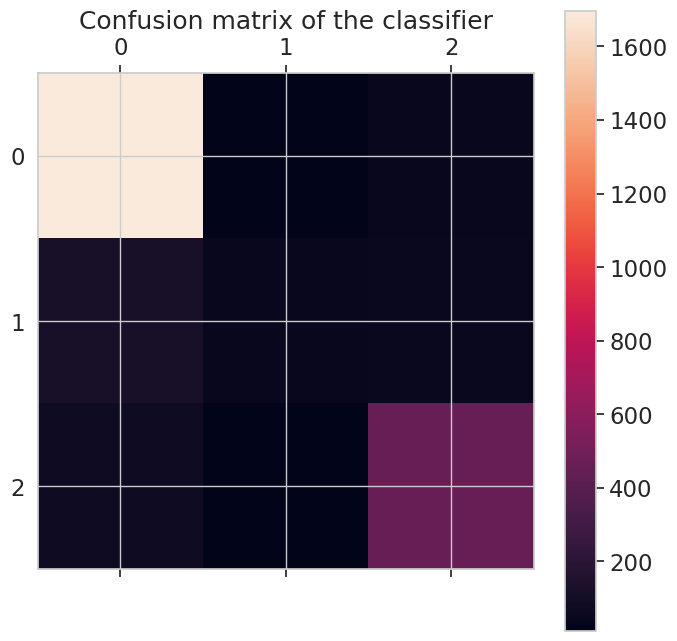

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           h       0.89      0.97      0.93      1756
           t       0.65      0.22      0.33       217
           u       0.82      0.82      0.82       553

    accuracy                           0.87      2526
   macro avg       0.79      0.67      0.69      2526
weighted avg       0.86      0.87      0.85      2526

